# 파이썬 자연어처리 초급 미션: 맛집 리뷰 분석 챌린지

## 배경 스토리
당신은 인기 맛집 리뷰 분석가입니다.
네이버 블로그나 소셜 미디어에 올라온 한식 맛집 리뷰를 모아서, 자주 쓰이는 키워드를 추출하고 시각화하여 다음 방문자를 위한 가이드를 만들려고 합니다.



아래 2개 데이터셋을 사용합니다: 

dataset for model learning/kakaomap_data/review_labeled.xslx 

dataset used for website/navermap_restaurant_reviews_data.xslsx 사용해서 분석 진행.

참조: https://github.com/DataScience-Lab-Yonsei/24-1_DSL_Modeling_NLP2_Restaurant_Review_Sentiment_Analysis?utm_source=chatgpt.com

" GitHub
DataScience-Lab-Yonsei/24 ... - GitHub
음식점 긍부정 리뷰 요약 및 카테고리 세분화; 카카오 리뷰 데이터를 활용하여 fine tuning한 KoELECTRA 모델로 네이버 음식점 리뷰의 긍부정을 분석하였습니다... "

## 과제 요구사항

1. **데이터 불러오기 & 전처리**
   - `pandas`로 데이터셋 로드
   - 결측치 제거, 이모지·특수문자 제거

2. **형태소 분석**
   - `konlpy`의 `Okt` 또는 `Mecab` 사용
   - 명사 추출 및 사용자 지정 불용어 제거

3. **단어 빈도 분석**
   - 전체 리뷰 명사의 빈도 계산
   - 상위 20개 단어 출력

4. **워드 클라우드 시각화**
   - `wordcloud` 라이브러리 사용
   - 한글 폰트 지정
   - 워드 클라우드 이미지 저장 및 출력

5. **(보너스) 맛집별 키워드 비교**
   - 식당별 상위 10개 단어 추출
   - `matplotlib`로 빈도 막대그래프 그리기

## 제출물

- Jupyter Notebook (`NLP_Mission_GitHub_Dataset.ipynb`)
- 코드 실행 결과 캡처
- `wordcloud.png` 파일

# 1. **데이터 불러오기 & 전처리**
   - `pandas`로 데이터셋 로드
   - 결측치 제거, 이모지·특수문자 제거

In [83]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
# from wordcloud import WordCloud
import matplotlib.pyplot as plt

#카카오 리뷰데이터를 활용 
# 1. 데이터 로드
df1 = pd.read_excel('/Users/jiyeonpark/Desktop/생성AI부트캠프/Mission/0512/review_labeled.xlsx')
df2 = pd.read_excel('/Users/jiyeonpark/Desktop/생성AI부트캠프/Mission/0512/navermap_restaurant_reviews_data.xlsx')



print(df1.head())
# # 2. 전처리 함수 예시
# def preprocess(text):
#     # 이모지·특수문자 제거 함수 작성
#     return text

# # 이후 과제에 따라 코드 작성...


   Unnamed: 0                                       Sentence  Label
0           0                       다른덴 잘없는 라조육덮밥 라조기덮밥 맛있어요      1
1           1                                           맛있어요      1
2           2                           여자친구가 너무 좋아함 맛있게 먹었음      1
3           3           요즘 곱창 대란이라고 다른데는 양 엄청 줄었는데 여기는 그대로넹효      1
4           4  그리고 사무실 돌아와서도 계속 옷에서 냄새가 나서 다시 가고 싶은 생각은 안드네요      0


In [84]:
df1 = df1.drop(columns=['Unnamed: 0'])
df1.head()


,Sentence,Label
0,다른덴 잘없는 라조육덮밥 라조기덮밥 맛있어요,1
1,맛있어요,1
2,여자친구가 너무 좋아함 맛있게 먹었음,1
3,요즘 곱창 대란이라고 다른데는 양 엄청 줄었는데 여기는 그대로넹효,1
4,그리고 사무실 돌아와서도 계속 옷에서 냄새가 나서 다시 가고 싶은 생각은 안드네요,0


In [85]:
df2.head()

,가게,작성자,리뷰
0,쭈꾸미블루스,밍유토리,NaN
1,쭈꾸미블루스,칠월일일,쭈꾸미가 탱글탱글하고 양도 많고 구성도 알찼어요😋 적당히 매콤해서 맵찔이도 맛있게 ...
2,쭈꾸미블루스,eun4062,NaN
3,쭈꾸미블루스,검프16,"쭈꾸미 삼겹살 신촌맛집. 레트로한 분위기와 잘 어울리는 홍합탕, 콘치즈, 계란찜 등..."
4,쭈꾸미블루스,밥곤듀,아주 추천하는 곳입니다~ 쭈꾸미 맛있어요! 쭈꾸미 통통하고 크고. 소스가 적당히 딱...


In [86]:
#데이터 크기/ 컬럼 정보/ 샘플 확인/ 결측치 확인/ 라벨 분포
#1.데이터 크기 
print("🎯데이터 크기")
print("")
print("df1 크기:", df1.shape)
print("df2 크기:", df2.shape)
print("----------------")
#2. 컬럼 정보
print("🎯컬럼 정보")
print("")
print("📈[df1 정보]")
print(df1.info())
print("")
print("📈[df2 정보]")
print(df2.info())

🎯데이터 크기

df1 크기: (2301, 2)
df2 크기: (780, 3)
----------------
🎯컬럼 정보

📈[df1 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2301 non-null   object
 1   Label     2301 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.1+ KB
None

📈[df2 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   가게      780 non-null    object
 1   작성자     780 non-null    object
 2   리뷰      622 non-null    object
dtypes: object(3)
memory usage: 18.4+ KB
None


In [87]:
#3.샘플 확인
df1.head()

,Sentence,Label
0,다른덴 잘없는 라조육덮밥 라조기덮밥 맛있어요,1
1,맛있어요,1
2,여자친구가 너무 좋아함 맛있게 먹었음,1
3,요즘 곱창 대란이라고 다른데는 양 엄청 줄었는데 여기는 그대로넹효,1
4,그리고 사무실 돌아와서도 계속 옷에서 냄새가 나서 다시 가고 싶은 생각은 안드네요,0


In [88]:
df2.head()

,가게,작성자,리뷰
0,쭈꾸미블루스,밍유토리,NaN
1,쭈꾸미블루스,칠월일일,쭈꾸미가 탱글탱글하고 양도 많고 구성도 알찼어요😋 적당히 매콤해서 맵찔이도 맛있게 ...
2,쭈꾸미블루스,eun4062,NaN
3,쭈꾸미블루스,검프16,"쭈꾸미 삼겹살 신촌맛집. 레트로한 분위기와 잘 어울리는 홍합탕, 콘치즈, 계란찜 등..."
4,쭈꾸미블루스,밥곤듀,아주 추천하는 곳입니다~ 쭈꾸미 맛있어요! 쭈꾸미 통통하고 크고. 소스가 적당히 딱...


In [ ]:
#4.결측치 확인
print("df1 결측치")
df1.isnull().sum()



df1 결측치


Sentence    0
Label       0
dtype: int64

In [90]:
print("df2 결측치")
df2.isnull().sum()

df2 결측치


가게       0
작성자      0
리뷰     158
dtype: int64

In [91]:
#리뷰 데이터 null값 or 빈 문자열인 행 제거 
df2 = df2.dropna(subset=['리뷰'])
df2 = df2[df2['리뷰'].str.strip() != '']

In [92]:
df2.isnull().sum()

가게     0
작성자    0
리뷰     0
dtype: int64

In [73]:
# 5. 라벨 분포
print(df1['Label'].value_counts(normalize=True))


Label
1    0.638418
0    0.361582
Name: proportion, dtype: float64


In [ ]:
import re

#특수문자, 이모지 제거 함수 
def clean_text(text):
    # 한글, 영문, 숫자, 공백, 문장부호(.,!?,)만 남긴다
    return re.sub(r'[^가-힣a-zA-Z0-9\s\.\,\!\?]', '', text)


df2['cleaned'] = df2['리뷰'].apply(clean_text)
df1['cleaned'] = df1['Sentence'].apply(clean_text)


#확인
print("==== navermap_restaurant_reviews_data.xlsx 샘플===")
print(df2[['가게','작성자','cleaned']].head(), end = '\n\n')

print("=== review_labeled.xlsx 샘플===")
df1.head()

==== navermap_restaurant_reviews_data.xlsx 샘플===
        가게     작성자                                            cleaned
1   쭈꾸미블루스    칠월일일  쭈꾸미가 탱글탱글하고 양도 많고 구성도 알찼어요 적당히 매콤해서 맵찔이도 맛있게 먹...
3   쭈꾸미블루스    검프16  쭈꾸미 삼겹살 신촌맛집. 레트로한 분위기와 잘 어울리는 홍합탕, 콘치즈, 계란찜 등...
4   쭈꾸미블루스     밥곤듀  아주 추천하는 곳입니다 쭈꾸미 맛있어요! 쭈꾸미 통통하고 크고. 소스가 적당히 딱 ...
6   쭈꾸미블루스     공보리                           푸짐하도 싱싱하고 친절한 신촌 쭈꾸미 맛집 
11  쭈꾸미블루스  청담동장마담                                             넘흐맛있어요

=== review_labeled.xlsx 샘플===


,Sentence,Label,cleaned
0,다른덴 잘없는 라조육덮밥 라조기덮밥 맛있어요,1,다른덴 잘없는 라조육덮밥 라조기덮밥 맛있어요
1,맛있어요,1,맛있어요
2,여자친구가 너무 좋아함 맛있게 먹었음,1,여자친구가 너무 좋아함 맛있게 먹었음
3,요즘 곱창 대란이라고 다른데는 양 엄청 줄었는데 여기는 그대로넹효,1,요즘 곱창 대란이라고 다른데는 양 엄청 줄었는데 여기는 그대로넹효
4,그리고 사무실 돌아와서도 계속 옷에서 냄새가 나서 다시 가고 싶은 생각은 안드네요,0,그리고 사무실 돌아와서도 계속 옷에서 냄새가 나서 다시 가고 싶은 생각은 안드네요


# 2. **형태소 분석**
 **문제 풀이 설명**
- `konlpy`의 `Okt`로 **명사**만 추출합니다.
- 빈도 분석 시 방해가 되는 불용어(‘정말’, ‘너무’, ‘진짜’, ‘것’, ‘있다’ 등)를 제거합니다.

In [99]:
okt = Okt()
stopwords = {'정말', '너무', '진짜', '것', '있다','하다','요','네요'}

def extract_nouns(text):
    nouns = okt.nouns(text)
    return [n for n in nouns if len(n)>1 and n not in stopwords]
#라벨 데이터 
df1['nouns'] = df1['cleaned'].apply(extract_nouns)
#리뷰 데이터 
df2['nouns'] = df2['cleaned'].apply(extract_nouns)

#확인 
print("레이블 데이터 명사 샘플:")
print(df1[['cleaned','nouns']].iloc[0])
print("리뷰 별 추출된 명사 샘플")
print(df2[['cleaned','nouns']].iloc[0])

레이블 데이터 명사 샘플:
cleaned    다른덴 잘없는 라조육덮밥 라조기덮밥 맛있어요
nouns                      [조육, 조기]
Name: 0, dtype: object
리뷰 별 추출된 명사 샘플
cleaned    쭈꾸미가 탱글탱글하고 양도 많고 구성도 알찼어요 적당히 매콤해서 맵찔이도 맛있게 먹...
nouns             [쭈꾸미, 양도, 구성, 매콤, 볶음밥, 치즈, 계란, 미네, 사장, 서도]
Name: 1, dtype: object


# 3. **단어 빈도 분석**
   - 전체 리뷰 명사의 빈도 계산
   - 상위 20개 단어 출력

In [100]:
#navermap_restaurant_reviews_data 기준
all_nouns = sum(df2['nouns'].tolist(), [])
all_nouns = sum(df2['nouns'].tolist(), [])
freq = Counter(all_nouns)
top20 = freq.most_common(20)

print("맛집 전체 리뷰 상위 20개 단어")

for word, cnt in top20:
    print(f"{word} : {cnt}")

맛집 전체 리뷰 상위 20개 단어
쭈꾸미 : 110
볶음밥 : 78
맛집 : 43
신촌 : 34
쭈삼 : 26
치즈 : 25
존맛 : 24
날치 : 24
방문 : 22
사장 : 20
직원 : 20
분위기 : 19
계란찜 : 19
양도 : 17
깻잎 : 17
양념 : 17
최고 : 16
고기 : 16
매콤 : 15
메뉴 : 15


# 4. **워드 클라우드 시각화**
   - `wordcloud` 라이브러리 사용
   - 한글 폰트 지정
   - 워드 클라우드 이미지 저장 및 출력

   -> WordCloud로 상위 20개 단어를 시각화하여 wordcloud.png로 저장하고 출력.

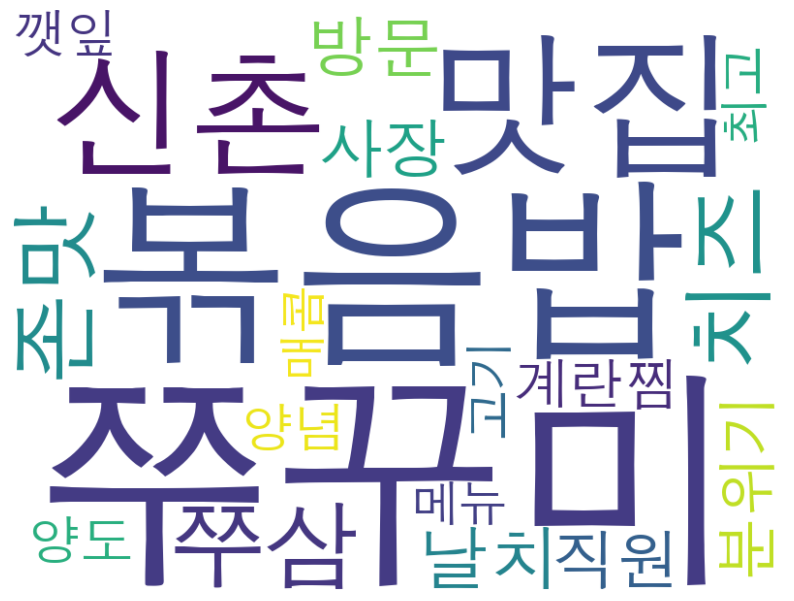

In [104]:
import platform
from wordcloud import WordCloud


#워드 클라우드 생성
#OS별 폰트 설정 

if platform.system() == 'Windows':
    font_path = 'NanumFothic.ttf'
elif platform.system() == 'Darwin': #macOS
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
else: #Assume Colab or Linux
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(
    font_path=font_path,
    width =800, height=600,
    background_color = 'white'
).generate_from_frequencies(dict(top20))

#파일로 저장 
wc.to_file('wordcloud.png')

#출력
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

5. **(보너스) 맛집별 키워드 비교**
   - 식당별 상위 10개 단어 추출
   - `matplotlib`로 빈도 막대그래프 그리기

In [105]:
grouped = df2.groupby('가게')['nouns'].sum()

print(grouped)

가게
정통집 신촌점    [인원, 인원, 정도, 껍데기, 냄새, 손님, 가격, 식감, 완전, 고추, 맛집, ...
쭈꾸미블루스     [쭈꾸미, 양도, 구성, 매콤, 볶음밥, 치즈, 계란, 미네, 사장, 서도, 쭈꾸미...
Name: nouns, dtype: object


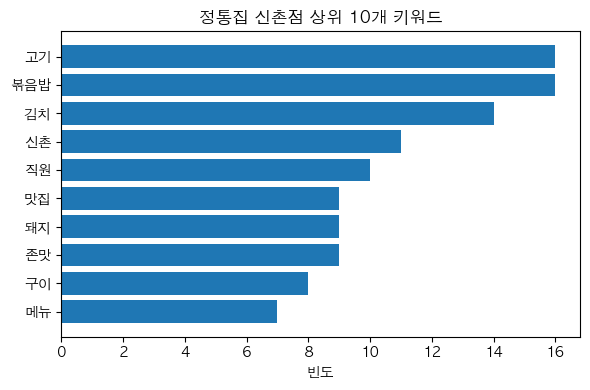

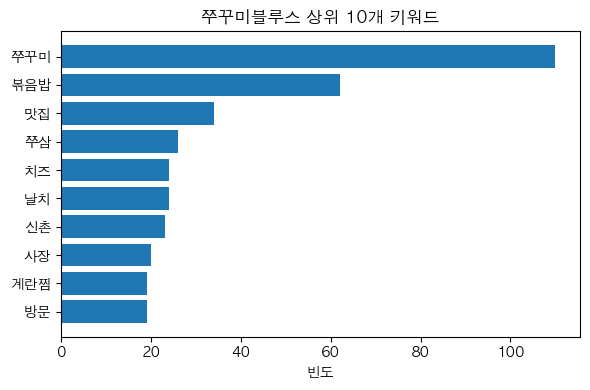

In [107]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS인 경우
# plt.rcParams['font.family'] = 'NanumGothic'  # 설치했을 때
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


for name, nouns in grouped.items():
    cnt = Counter(nouns)
    top10 = cnt.most_common(10)
    words, counts = zip(*top10)

    plt.figure(figsize=(6,4))
    plt.barh(words[::-1], counts[::-1])
    plt.title(f"{name} 상위 10개 키워드")
    plt.xlabel("빈도")
    plt.tight_layout()
    plt.show()

/var/folders/5h/9d1tm36x78vg7z4pjs8gzzv00000gn/T/ipykernel_50350/2627455055.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts[::-1], y=words[::-1], palette='deep')


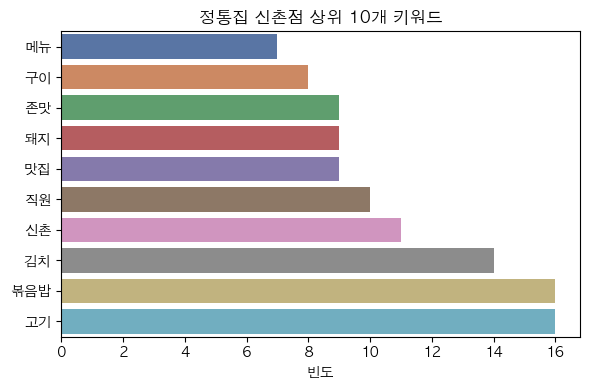

/var/folders/5h/9d1tm36x78vg7z4pjs8gzzv00000gn/T/ipykernel_50350/2627455055.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts[::-1], y=words[::-1], palette='deep')


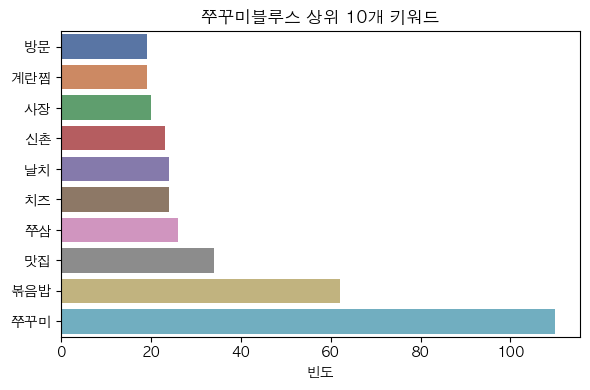

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

for name, nouns in grouped.items():
    cnt = Counter(nouns)
    top10 = cnt.most_common(10)
    words, counts = zip(*top10)

    plt.figure(figsize=(6,4))
    sns.barplot(x=counts[::-1], y=words[::-1], palette='deep')
    plt.title(f"{name} 상위 10개 키워드")
    plt.xlabel("빈도")
    plt.tight_layout()
    plt.show()
